<a href="https://colab.research.google.com/github/joeytarnowski/CSCI6840_Project2/blob/main/CSCI6840_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 20

# Dataset and DataLoader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Splitting dataset into training and validation sets (50,000 train, 10,000 validation)
train_size = 50000
val_size = 10000
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Feedforward Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(784, 128) # 28x28 input, 128 output (hidden layer 1)
        self.fc2 = nn.Linear(128, 64) # 128 input (hidden layer 1), 64 output (hidden layer 2)
        self.fc3 = nn.Linear(64, 10) # 64 output (hidden layer 2), 10x1 output
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

In [20]:
# Function to train the model
def train_model(model, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        correct = 0
        total = 0

        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()  # Zero the gradients

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total * 100
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validation phase
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = correct / total * 100
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}]:\nTraining Loss: {train_loss:.4f}, Training Acc: {train_acc:.2f}%\nValidation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.2f}%')

    return train_losses, val_losses, train_accs, val_accs

# Function to evaluate the model on the test set
def evaluate_model(name, model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    print(f'Test Accuracy ({name}): {accuracy:.2f}%')

# Function to plot the results of the training
def plot_results(name, train_losses, val_losses, train_accs, val_accs):
  # Plotting the loss and accuracy
  plt.figure(figsize=(12,5))

  plt.subplot(1, 2, 1)
  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(f'Training and Validation Loss ({name})')

  plt.subplot(1, 2, 2)
  plt.plot(train_accs, label='Train Accuracy')
  plt.plot(val_accs, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy (%)')
  plt.legend()
  plt.title(f'Training and Validation Accuracy ({name})')

  plt.show()

Epoch [1/20]:
Training Loss: 1.7056, Training Acc: 76.90%
Validation Loss: 1.6298, Validation Acc: 83.42%
Epoch [2/20]:
Training Loss: 1.6164, Training Acc: 84.73%
Validation Loss: 1.5461, Validation Acc: 91.94%
Epoch [3/20]:
Training Loss: 1.5393, Training Acc: 92.56%
Validation Loss: 1.5418, Validation Acc: 92.15%
Epoch [4/20]:
Training Loss: 1.5257, Training Acc: 93.75%
Validation Loss: 1.5190, Validation Acc: 94.36%
Epoch [5/20]:
Training Loss: 1.5161, Training Acc: 94.72%
Validation Loss: 1.5131, Validation Acc: 94.91%
Epoch [6/20]:
Training Loss: 1.5124, Training Acc: 94.96%
Validation Loss: 1.5102, Validation Acc: 95.27%
Epoch [7/20]:
Training Loss: 1.5067, Training Acc: 95.62%
Validation Loss: 1.5172, Validation Acc: 94.50%
Epoch [8/20]:
Training Loss: 1.5039, Training Acc: 95.84%
Validation Loss: 1.5079, Validation Acc: 95.40%
Epoch [9/20]:
Training Loss: 1.5022, Training Acc: 95.94%
Validation Loss: 1.5026, Validation Acc: 95.87%
Epoch [10/20]:
Training Loss: 1.4998, Training

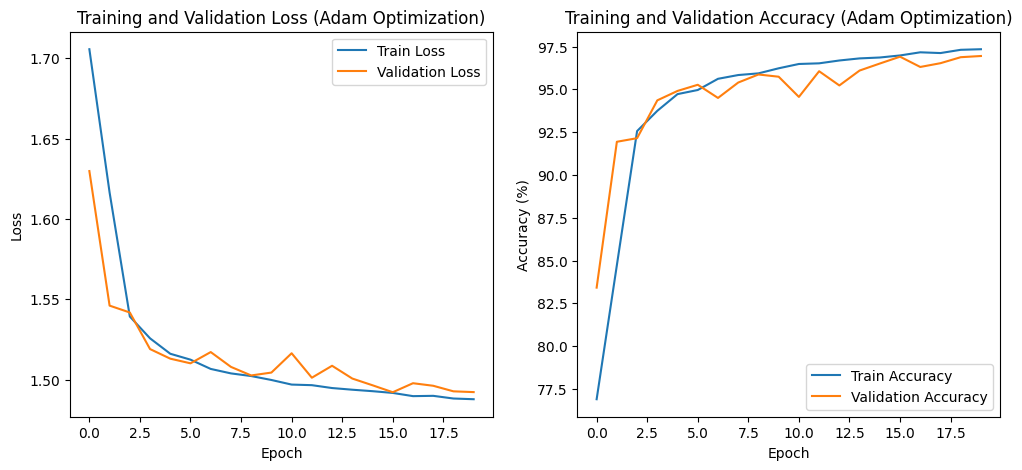

Test Accuracy (Adam Optimization): 97.25%


In [22]:
# Initialize the network, loss function, and Adam optimizer
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
train_losses, val_losses, train_accs, val_accs = train_model(model, train_loader, val_loader, num_epochs)

# Plotting the results
plot_results('Adam Optimization', train_losses, val_losses, train_accs, val_accs)

# Evaluating the model on the test set
evaluate_model('Adam Optimization', model, test_loader)

# Save the model
torch.save(model.state_dict(), 'adam_ann.pth')

Epoch [1/20]:
Training Loss: 2.3027, Training Acc: 10.35%
Validation Loss: 2.3021, Validation Acc: 11.36%
Epoch [2/20]:
Training Loss: 2.3014, Training Acc: 11.51%
Validation Loss: 2.3008, Validation Acc: 11.66%
Epoch [3/20]:
Training Loss: 2.3002, Training Acc: 11.62%
Validation Loss: 2.2996, Validation Acc: 11.53%
Epoch [4/20]:
Training Loss: 2.2989, Training Acc: 11.58%
Validation Loss: 2.2983, Validation Acc: 11.52%
Epoch [5/20]:
Training Loss: 2.2976, Training Acc: 11.59%
Validation Loss: 2.2970, Validation Acc: 11.66%
Epoch [6/20]:
Training Loss: 2.2962, Training Acc: 11.78%
Validation Loss: 2.2956, Validation Acc: 11.90%
Epoch [7/20]:
Training Loss: 2.2947, Training Acc: 12.43%
Validation Loss: 2.2939, Validation Acc: 12.79%
Epoch [8/20]:
Training Loss: 2.2928, Training Acc: 14.16%
Validation Loss: 2.2919, Validation Acc: 15.11%
Epoch [9/20]:
Training Loss: 2.2906, Training Acc: 17.49%
Validation Loss: 2.2895, Validation Acc: 20.18%
Epoch [10/20]:
Training Loss: 2.2880, Training

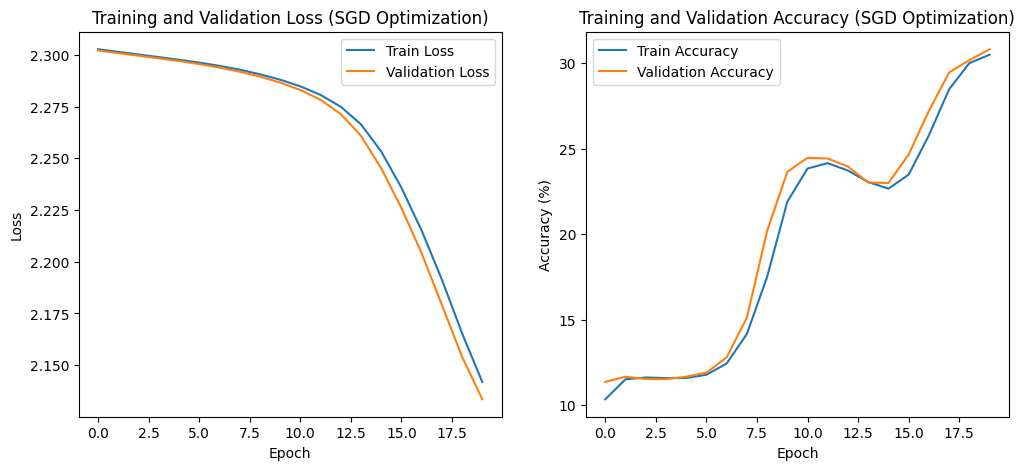

Test Accuracy (SGD Optimization): 30.70%


In [23]:
# Initialize network with SGD optimizer
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
train_losses2, val_losses2, train_accs2, val_accs2 = train_model(model, train_loader, val_loader, num_epochs)

# Plotting the results
plot_results('SGD Optimization', train_losses2, val_losses2, train_accs2, val_accs2)

# Evaluating the model on the test set
evaluate_model('SGD Optimization', model, test_loader)

# Save the model
torch.save(model.state_dict(), 'sgd_ann.pth')